In [0]:
#import findspark
#findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("enigh").getOrCreate()

In [0]:
%matplotlib inline

In [0]:
import sys

from pyspark.sql.types import StringType, DateType, FloatType

from pyspark.sql.window import Window

from pyspark.sql.functions import col, substring, when, countDistinct, length, lit, sum, avg, count, min, window, mean, round

In [0]:
import numpy as np
import pandas as pd
import json
import os

pd.set_option('display.max_columns',None)

In [0]:
#%fs rm -r dbfs:/FileStore/tables/enigh/catalogos-csv/clave.csv

res2: Boolean = true

In [0]:
%fs ls dbfs:/FileStore/tables/enigh/catalogos-csv/

path name size dbfs:/FileStore/tables/enigh/catalogos-csv/clave.csv clave.csv 58843 dbfs:/FileStore/tables/enigh/catalogos-csv/forma_pag1.csv forma_pag1.csv 275 dbfs:/FileStore/tables/enigh/catalogos-csv/lugar_comp.csv lugar_comp.csv 521

In [0]:
dbfs:/FileStore/tables/enigh/catalogos-csv/

In [0]:
df_claves = spark.read.csv('/FileStore/tables/enigh/catalogos-csv/clave.csv', header = True)

In [0]:
# df = spark.read.csv('/FileStore/tables/enigh/data_limpia.csv', header = True)
df = spark.read.csv('/FileStore/tables/enigh/gastoshogar_limpia_completa.csv', header = True)

In [0]:
df = df.withColumn(
    "cantidad", col("cantidad").cast(FloatType())
).withColumn(
    "gasto", col("gasto").cast(FloatType())
).withColumn(
    "gasto_tri", col("gasto_tri").cast(FloatType())
)

In [0]:
#df = spark.read.text('/FileStore/tables/enigh/gastoshogar.txt', lineSep)

# df = spark.read.csv('/FileStore/tables/enigh/gastoshogar.txt', header = True)

In [0]:
df.printSchema()

root
 |-- folioviv: string (nullable = true)
 |-- foliohog: string (nullable = true)
 |-- clave: string (nullable = true)
 |-- mes_dia: string (nullable = true)
 |-- forma_pag1: string (nullable = true)
 |-- lugar_comp: string (nullable = true)
 |-- cantidad: float (nullable = true)
 |-- gasto: float (nullable = true)
 |-- gasto_tri: float (nullable = true)
 |-- clave codificación: string (nullable = true)
 |-- forma_pag1 codificación: string (nullable = true)
 |-- lugar_comp codificación: string (nullable = true)



In [0]:
df_claves.printSchema()

root
 |-- clave: string (nullable = true)
 |-- clave codificación: string (nullable = true)
 |-- clave2: string (nullable = true)
 |-- rubro: string (nullable = true)



In [0]:
df_estados = spark.read.csv('/FileStore/tables/enigh/estados.csv', header = True)

In [0]:
df_estados.printSchema()

root
 |-- clave_edo: string (nullable = true)
 |-- Enitidad: string (nullable = true)



In [0]:
## borrar columna
# df_estados = df_estados.drop('_c2')

In [0]:
%fs ls dbfs:/FileStore/tables/enigh/catalogos-csv/

path name size dbfs:/FileStore/tables/enigh/catalogos-csv/clave.csv clave.csv 34984 dbfs:/FileStore/tables/enigh/catalogos-csv/forma_pag1.csv forma_pag1.csv 275 dbfs:/FileStore/tables/enigh/catalogos-csv/lugar_comp.csv lugar_comp.csv 521

In [0]:
clave_df = spark.read.csv('/FileStore/tables/enigh/catalogos-csv/clave.csv', header = True)
forma_pag1_df = spark.read.csv('/FileStore/tables/enigh/catalogos-csv/forma_pag1.csv', header = True)
lugar_comp_df = spark.read.csv('/FileStore/tables/enigh/catalogos-csv/lugar_comp.csv', header = True)

In [0]:
clave_df.printSchema()
forma_pag1_df.printSchema()
lugar_comp_df.printSchema()

root
 |-- clave: string (nullable = true)
 |-- clave codificación: string (nullable = true)

root
 |-- forma_pag1: string (nullable = true)
 |-- forma_pag1 codificación: string (nullable = true)

root
 |-- lugar_comp: string (nullable = true)
 |-- lugar_comp codificación: string (nullable = true)



# Cruce tablas

In [0]:
df_claves.groupBy('rubro').agg(count(col('clave2'))).show(5)

+--------------------+-------------+
|               rubro|count(clave2)|
+--------------------+-------------+
|cultura y recreacion|           14|
|adquisicion trans...|            4|
|    cuidado personal|           27|
|              ahorro|            1|
|alimentos fura de...|            6|
+--------------------+-------------+
only showing top 5 rows



In [0]:
df = df.join(df_claves, ['clave'], 'left')


In [0]:
df.show(5)

+-----+----------+--------+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+--------------------+------+---------------+
|clave|  folioviv|foliohog|mes_dia|forma_pag1|lugar_comp|cantidad|gasto|gasto_tri|  clave codificación|forma_pag1 codificación|lugar_comp codificación|  clave codificación|clave2|          rubro|
+-----+----------+--------+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+--------------------+------+---------------+
| C001|0100013605|       1|   null|        01|        06|    null| 36.0|    108.0|Detergentes (polv...|               Efectivo|          Supermercados|Detergentes (polv...|  C001|articulos hogar|
| C004|0100013605|       1|   null|        01|        06|    null| 19.0|     57.0|Suavizantes de telas|               Efectivo|          Supermercados|Suavizantes de telas|  C001|articulos hogar|
| C005|0100013605|  

In [0]:
df_estados.show()

+---------+--------------------+
|clave_edo|            Enitidad|
+---------+--------------------+
|       01|      Aguascalientes|
|       02|     Baja California|
|       03| Baja California Sur|
|       04|            Campeche|
|       05|Coahuila de Zaragoza|
|       06|              Colima|
|       07|             Chiapas|
|       08|           Chihuahua|
|       09|    Ciudad de México|
|       10|             Durango|
|       11|          Guanajuato|
|       12|            Guerrero|
|       13|             Hidalgo|
|       14|             Jalisco|
|       15|              México|
|       16| Michoacán de Ocampo|
|       17|             Morelos|
|       18|             Nayarit|
|       19|          Nuevo León|
|       20|              Oaxaca|
+---------+--------------------+
only showing top 20 rows



In [0]:
df = df.withColumn('clave_edo', substring(col('folioviv'), 1, 2))

In [0]:
df.show(5)

+-----+----------+--------+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+--------------------+------+---------------+---------+
|clave|  folioviv|foliohog|mes_dia|forma_pag1|lugar_comp|cantidad|gasto|gasto_tri|  clave codificación|forma_pag1 codificación|lugar_comp codificación|  clave codificación|clave2|          rubro|clave_edo|
+-----+----------+--------+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+--------------------+------+---------------+---------+
| C001|0100013605|       1|   null|        01|        06|    null| 36.0|    108.0|Detergentes (polv...|               Efectivo|          Supermercados|Detergentes (polv...|  C001|articulos hogar|       01|
| C004|0100013605|       1|   null|        01|        06|    null| 19.0|     57.0|Suavizantes de telas|               Efectivo|          Supermercados|Suavizantes de telas|  C0

In [0]:
df_join_edos = df.join(df_estados, ['clave_edo'], 'left')


In [0]:
df_f = df_join_edos.withColumn('area', when(substring(col('folioviv'), 3, 1) == '6', 'rural').otherwise('urbano'))

In [0]:
df_f.show(5)

+---------+-----+----------+--------+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+--------------------+------+---------------+--------------+------+
|clave_edo|clave|  folioviv|foliohog|mes_dia|forma_pag1|lugar_comp|cantidad|gasto|gasto_tri|  clave codificación|forma_pag1 codificación|lugar_comp codificación|  clave codificación|clave2|          rubro|      Enitidad|  area|
+---------+-----+----------+--------+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+--------------------+------+---------------+--------------+------+
|       01| C001|0100013605|       1|   null|        01|        06|    null| 36.0|    108.0|Detergentes (polv...|               Efectivo|          Supermercados|Detergentes (polv...|  C001|articulos hogar|Aguascalientes|urbano|
|       01| C004|0100013605|       1|   null|        01|        06|    null| 19.0|     5

In [0]:
# df_f = df_join_edos.withColumn('length_mesdia', length(col('mes_dia'))).withColumn('mes', when(length(col('mes_dia')) == 3, substring(col('mes_dia'), 1, 1)).when(length(col('mes_dia')) == 4, substring(col('mes_dia'), 1, 2)).otherwise(lit(None).cast(StringType())))

In [0]:
df_f = df_f.withColumn('mes', when(length(col('mes_dia')) == 3, substring(col('mes_dia'), 1, 1)).when(length(col('mes_dia')) == 4, substring(col('mes_dia'), 1, 2)).otherwise(lit(None).cast(StringType())))

In [0]:
df_f.filter(col('mes').isNotNull()).show(5)
# display(
#     df_f.filter(col('area') == 'rural').select('folioviv', 'mes_dia', 'mes', 'area')
# )

+---------+-----+----------+--------+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+--------------------+------+---------+--------------+------+---+
|clave_edo|clave|  folioviv|foliohog|mes_dia|forma_pag1|lugar_comp|cantidad|gasto|gasto_tri|  clave codificación|forma_pag1 codificación|lugar_comp codificación|  clave codificación|clave2|    rubro|      Enitidad|  area|mes|
+---------+-----+----------+--------+-------+----------+----------+--------+-----+---------+--------------------+-----------------------+-----------------------+--------------------+------+---------+--------------+------+---+
|       01| A004|0100021402|       1|   0909|      null|      null|     1.0| null|     null|Tortilla de maíz ...|                   null|                   null|Tortilla de maíz ...|  A001|abarrotes|Aguascalientes|urbano| 09|
|       01| A004|0100021402|       1|   0912|      null|      null|     1.0| null|     null|Tort

# Exploración

## Viz

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df_pd = df_f.toPandas()

In [0]:
g = sns.FacetGrid(df_pd, row='forma_pag1')
g.map(sns.histplot, x="gasto")

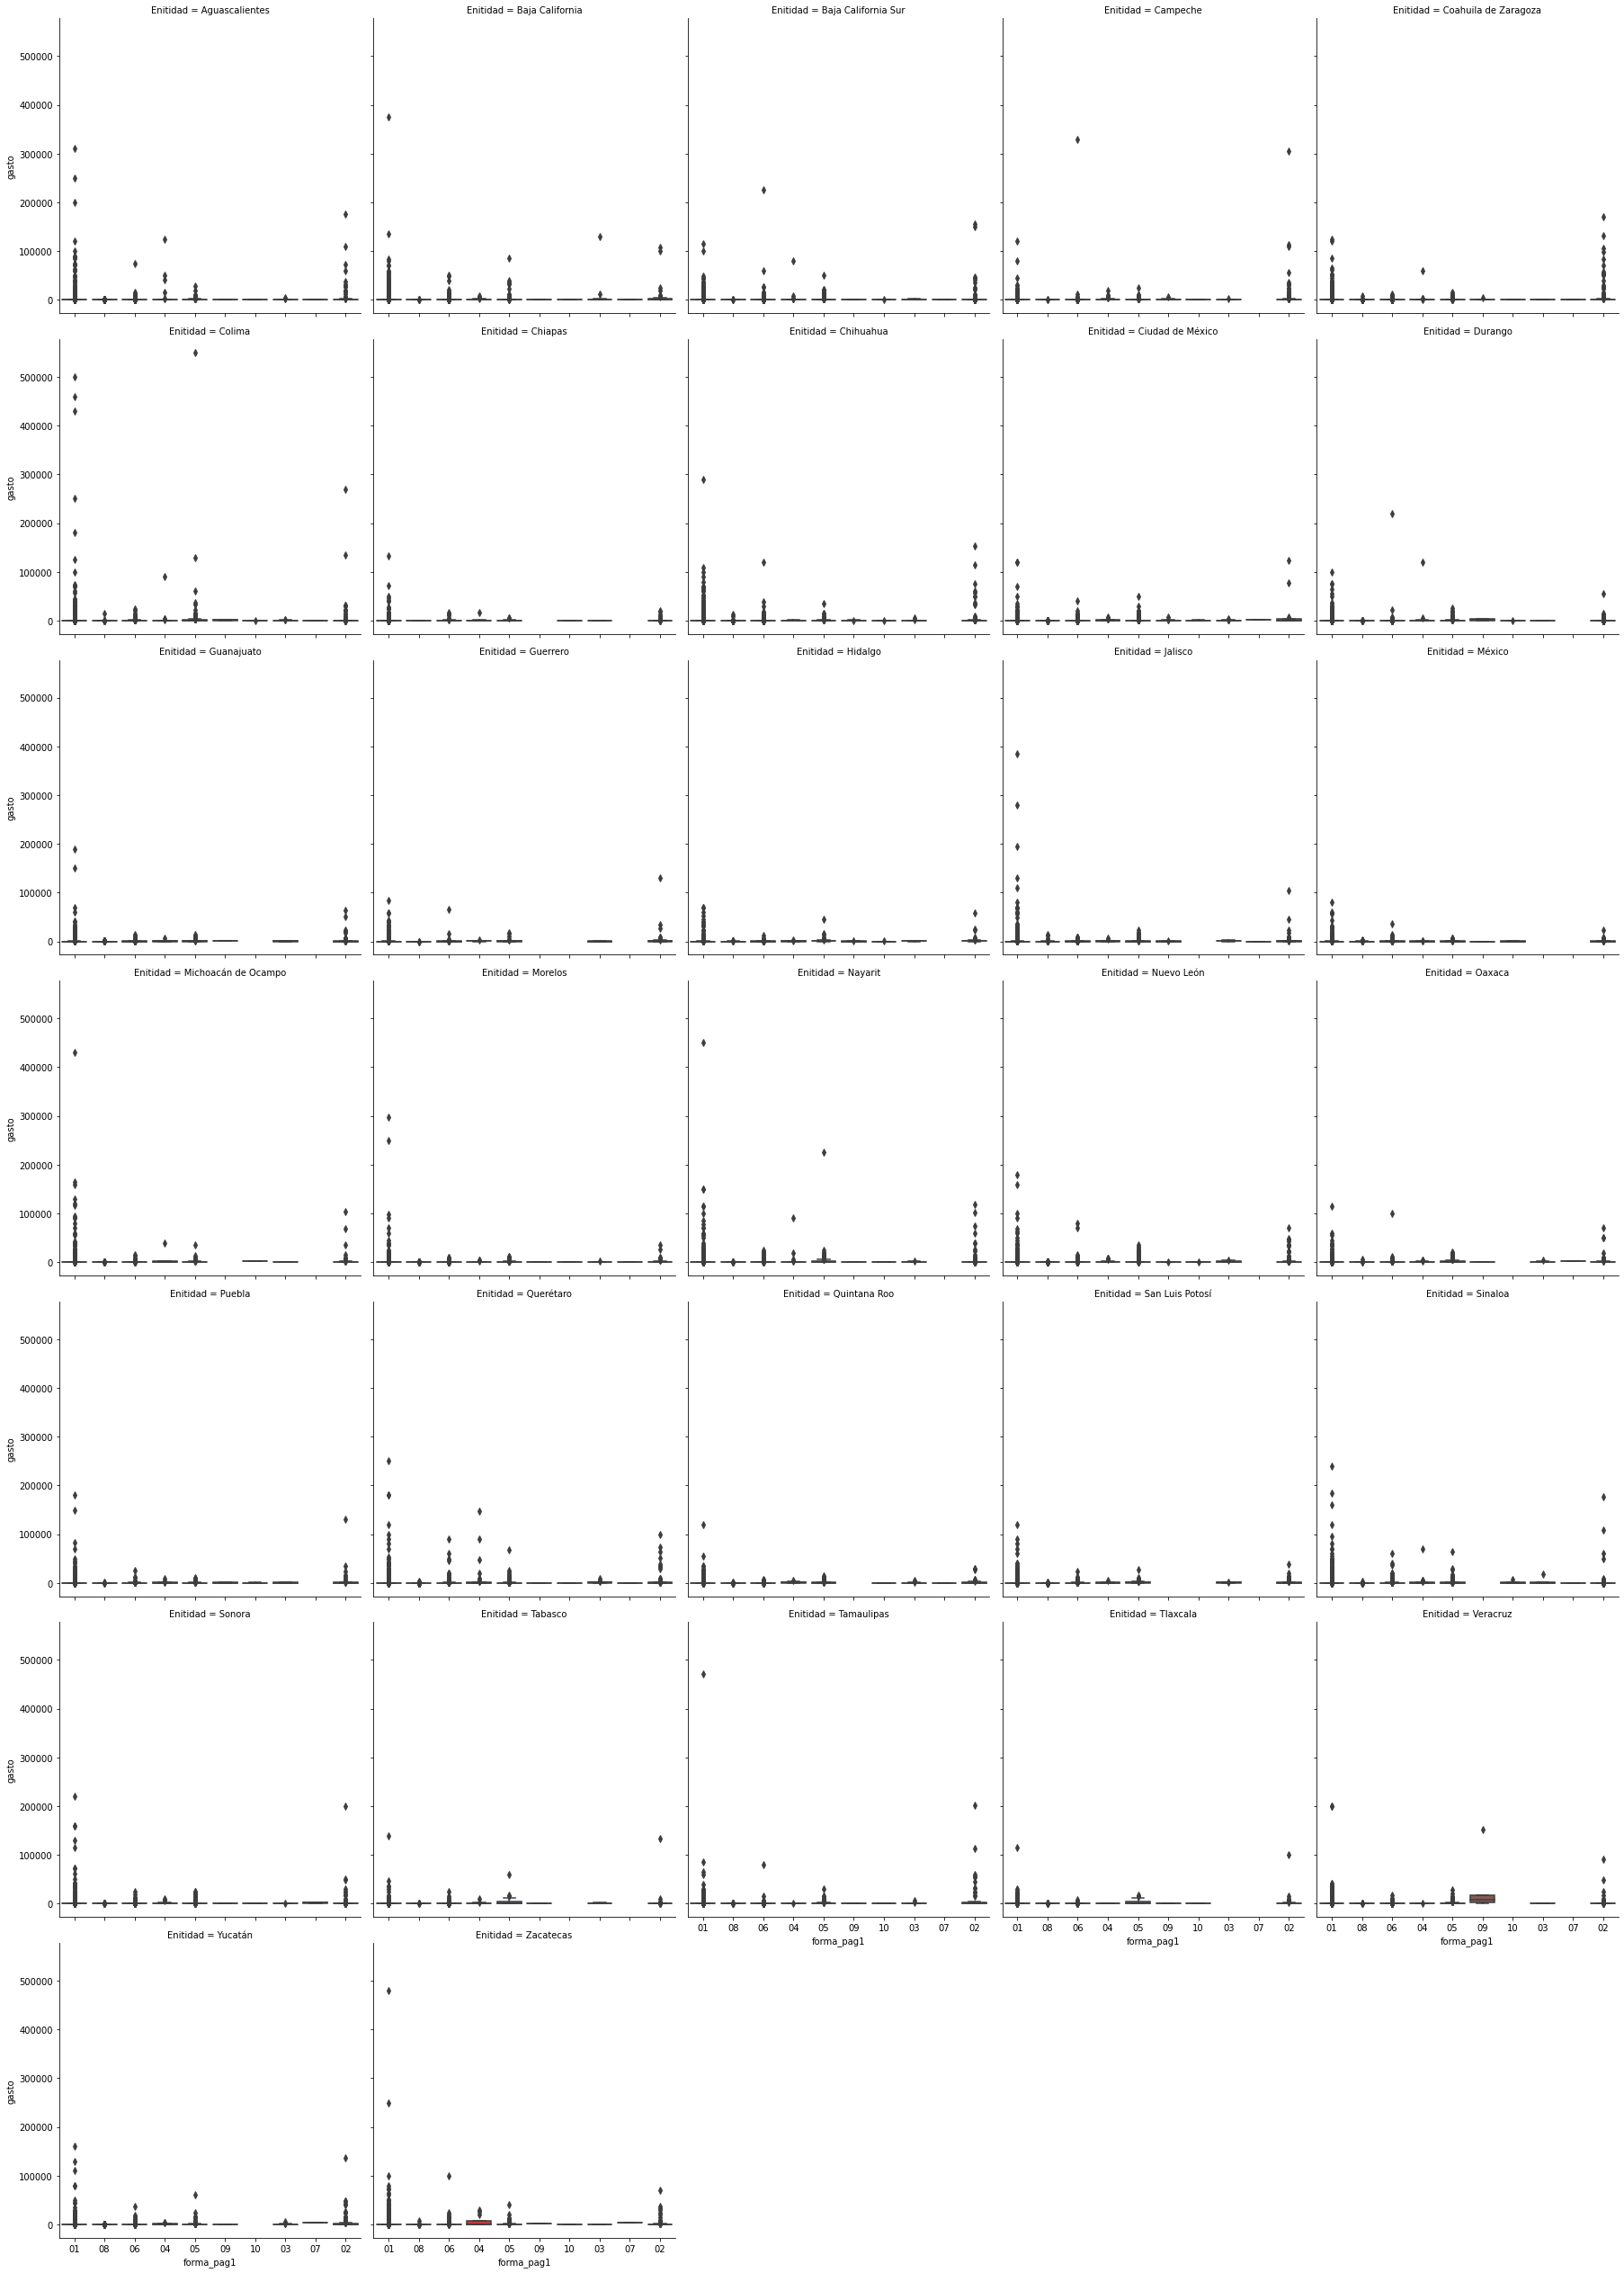

In [0]:
sns.catplot(data = df_pd,
            x = 'forma_pag1',
            y = 'gasto',
            kind = 'box',
            col="Enitidad",
            col_wrap=5
)
plt.show()

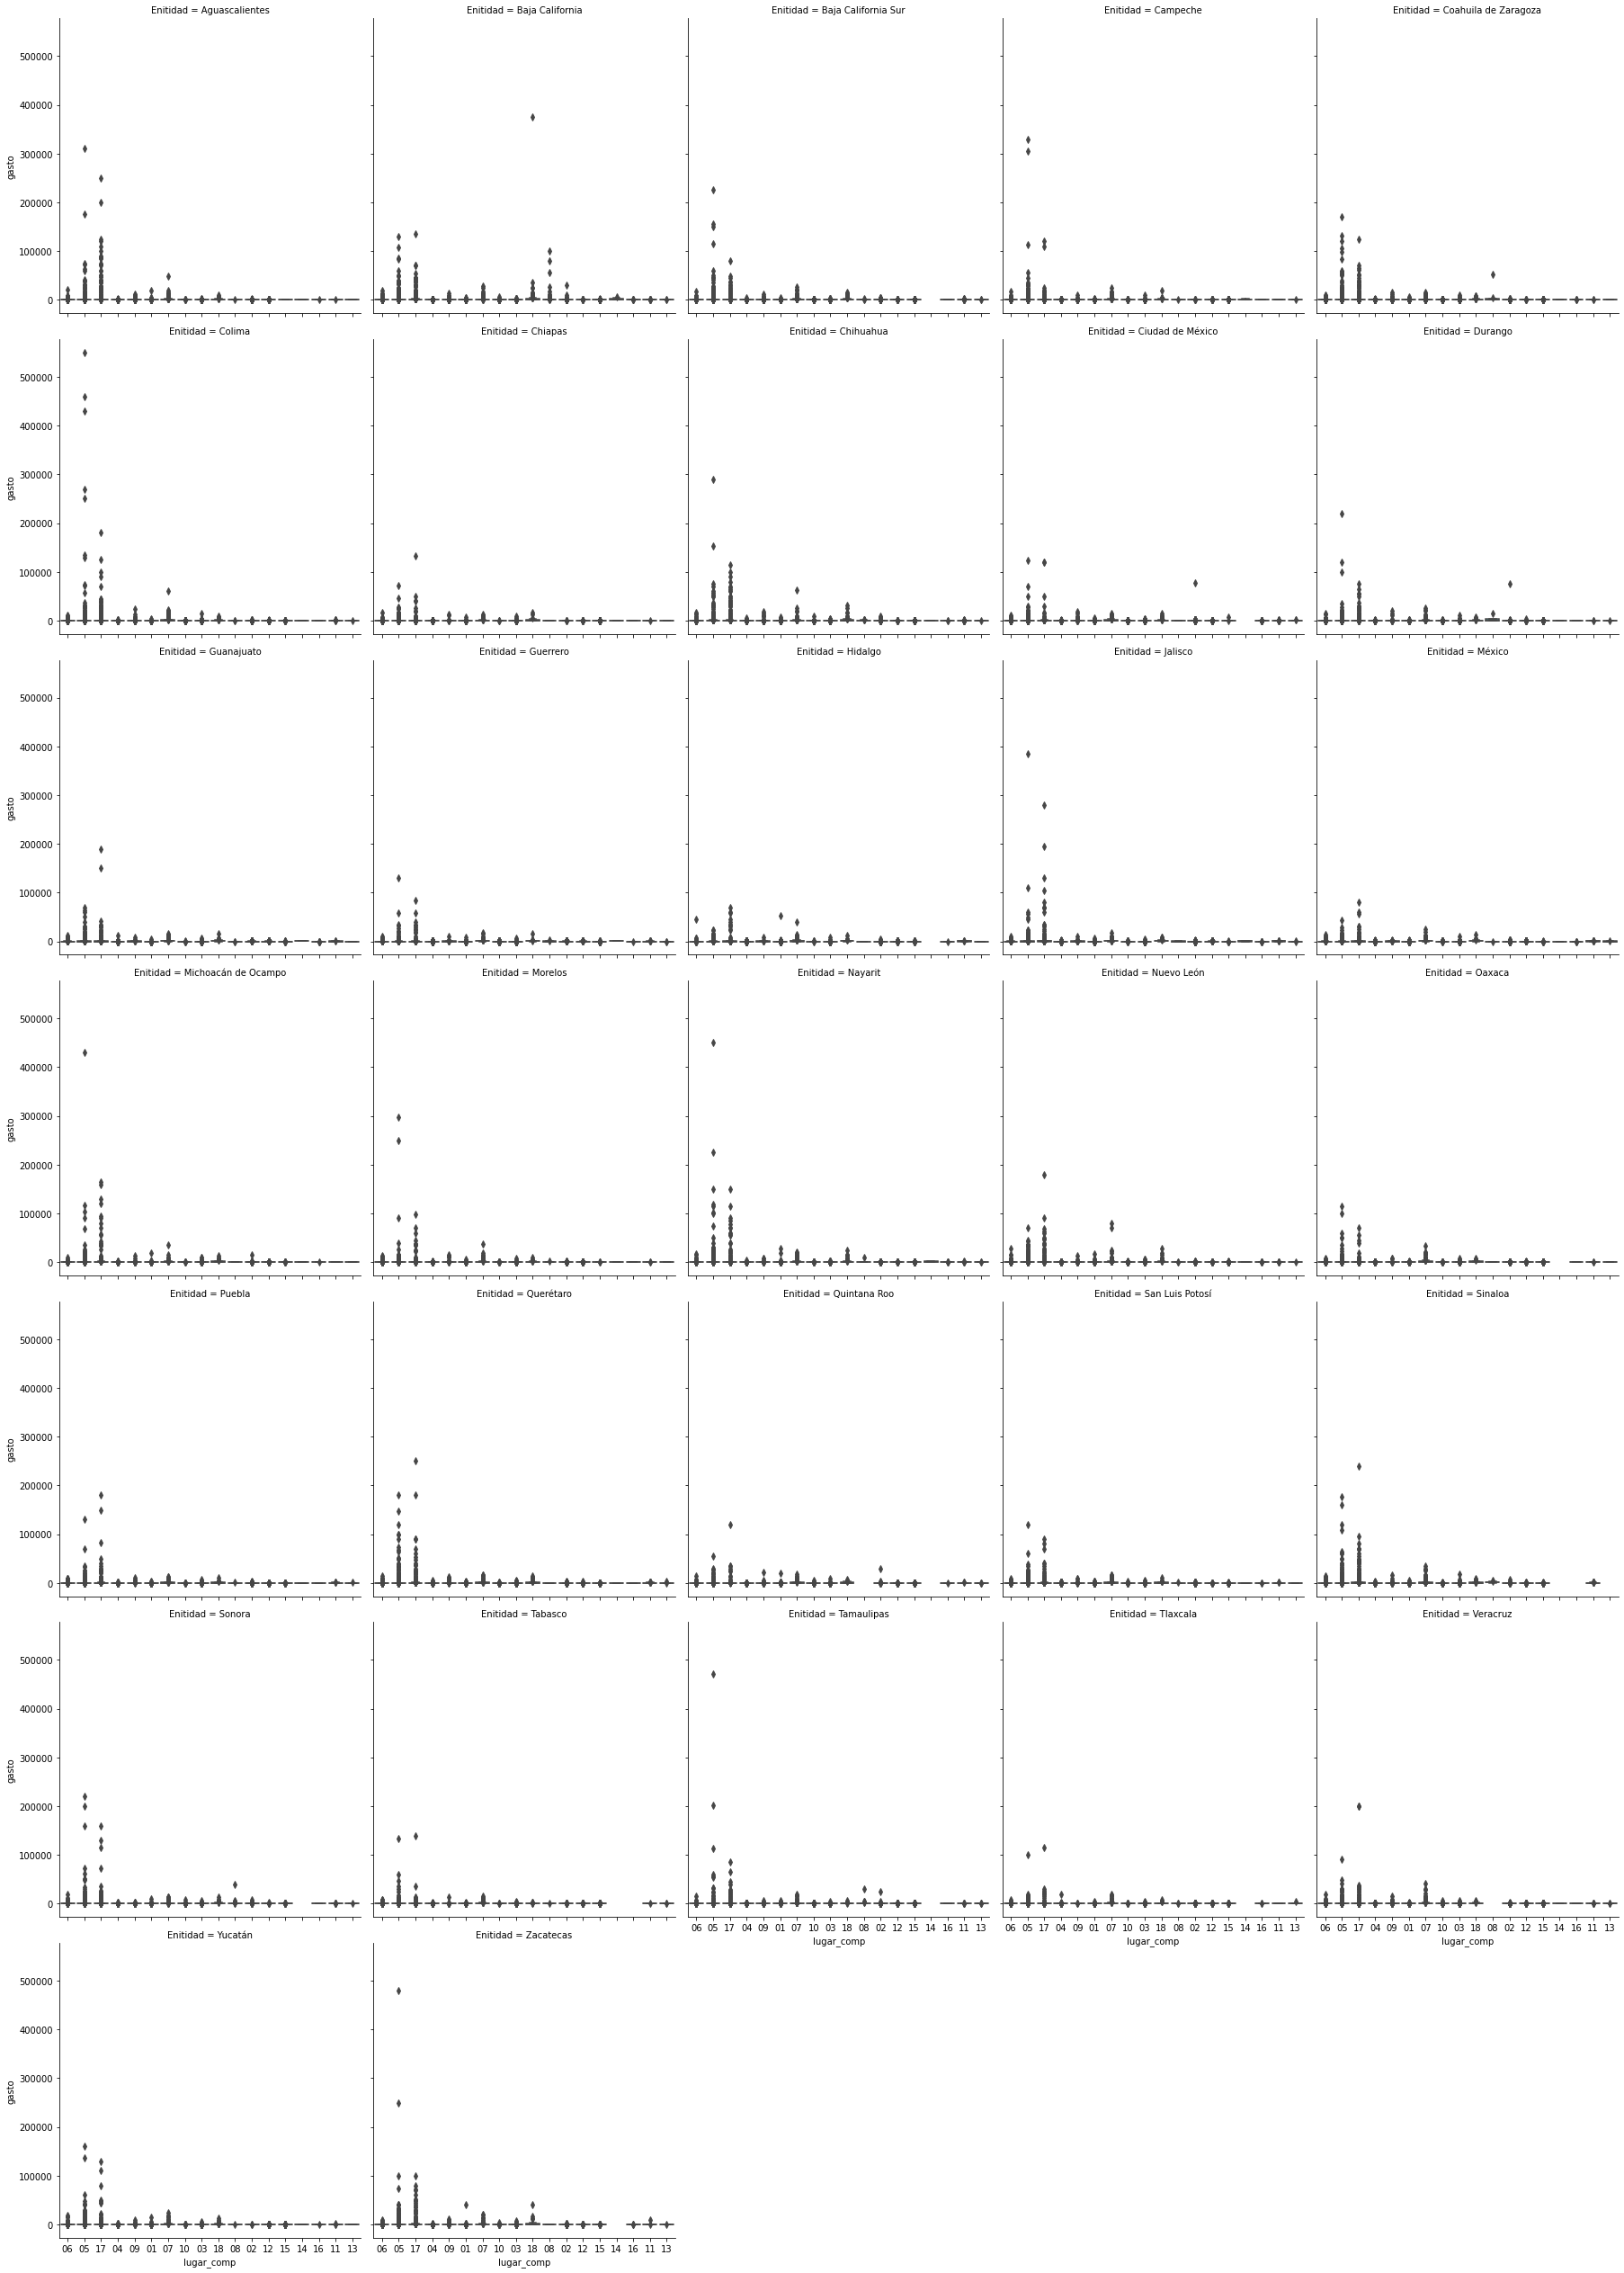

In [0]:
sns.catplot(data = df_pd,
            x = 'lugar_comp',
            y = 'gasto',
            kind = 'box',
            col="Enitidad",
            col_wrap=5
)
plt.show()

In [0]:
sns.catplot(data = df_pd,
            x = 'forma_pag1',
            y = 'gasto',
            kind = 'box',
            col="area",
            col_wrap=5
)
plt.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-3958578595169815> in <module>
----> 1 sns.catplot(data = df_pd,
      2             x = 'forma_pag1',
      3             y = 'gasto',
      4             kind = 'box',
      5             col="area",

NameError: name 'df_pd' is not defined

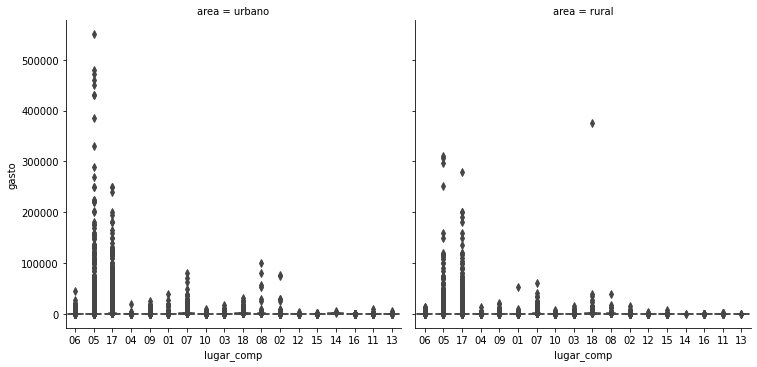

In [0]:
sns.catplot(data = df_pd,
            x = 'lugar_comp',
            y = 'gasto',
            kind = 'box',
            col="area",
            col_wrap=5
)
plt.show()

## analisis

Temas a desarrollar:

Rural y Urbano. Considerar ambas categorías y realizar el análisis por separado para posteriormente contrastar los resultados.

1.1. Calcular registros por área y sacar gastos per cápita
Mismo punto anterior pero para entidad federativa.

2.1. Calcular registros por estado y sacar gasto per cápita por clave

2.2. Una vez que tenemos los registros medir la correlación entre cantidad de registros y total gastado por entidad federativa.
Agrupar según si se gastó o no en gasolina e igual para tiendas con membresía. 

3.1 Ver diferencias en gasto promedio en x (internet, cafeterías + pulquerías, restaurantes, loncherías, torterías, cocinas economicas, etc)
3.2 Porcentaje de gasto en cada lugar de compra 

Pasos 

Comenzar con estadísticas y gráficas básicas para obtener información general de los datos. Primero a nivel general, luego a nivel grupo (área rural o urbana, entidad federativa o grupo de viviendas que cumplan cierta condición). Histogramas o box-plot, para identificar distribuciones y outliers.

In [0]:
df_f.printSchema()

root
 |-- clave_edo: string (nullable = true)
 |-- folioviv: string (nullable = true)
 |-- foliohog: string (nullable = true)
 |-- clave: string (nullable = true)
 |-- mes_dia: string (nullable = true)
 |-- forma_pag1: string (nullable = true)
 |-- lugar_comp: string (nullable = true)
 |-- cantidad: float (nullable = true)
 |-- gasto: float (nullable = true)
 |-- gasto_tri: float (nullable = true)
 |-- clave codificación: string (nullable = true)
 |-- forma_pag1 codificación: string (nullable = true)
 |-- lugar_comp codificación: string (nullable = true)
 |-- Enitidad: string (nullable = true)
 |-- area: string (nullable = false)
 |-- mes: string (nullable = true)



### gastos

In [0]:
df_gastos = df_f.groupBy("folioviv", "foliohog", "Enitidad", "area", 'mes', "rubro", "forma_pag1 codificación", "lugar_comp codificación", "clave_edo", "clave2", "forma_pag1", "lugar_comp").agg(
    sum('gasto').alias('gasto_mes'),
    count('gasto').alias('num_compras'),
    round(avg('gasto_tri'), 4).alias('prom_gasto_tri')
)

In [0]:
df_gastos.orderBy('folioviv', 'clave2', 'foliohog', 'mes').show(5)

+----------+--------+--------------+------+---+---------+-----------------------+-----------------------+---------+------+----------+----------+-----------------+-----------+--------------+
|  folioviv|foliohog|      Enitidad|  area|mes|    rubro|forma_pag1 codificación|lugar_comp codificación|clave_edo|clave2|forma_pag1|lugar_comp|        gasto_mes|num_compras|prom_gasto_tri|
+----------+--------+--------------+------+---+---------+-----------------------+-----------------------+---------+------+----------+----------+-----------------+-----------+--------------+
|0100013605|       1|Aguascalientes|urbano| 09|abarrotes|               Efectivo|   Tiendas de abarrotes|       01|  A001|        01|        04|            178.0|          6|      381.4233|
|0100013605|       1|Aguascalientes|urbano| 09|abarrotes|               Efectivo|   Tiendas específic...|       01|  A001|        01|        05|             48.0|          1|        617.14|
|0100013605|       1|Aguascalientes|urbano| 10|aba

cómo se normaliza el "gasto_tri"? y por qué tiene valores diferentes para los mismos rubros?

es válido sacar el promedio para el mes?

In [0]:
display(df_gastos.filter(col('gasto_viv').isNotNull() & col('mes').isNull() & (col('gasto') != col('gasto_mes'))).select('folioviv', 'clave', 'forma_pag1', 'lugar_comp', 'gasto', 'gasto_tri', 'mes', 'gasto_mes', 'num_compras', 'prom_gasto_tri').orderBy('folioviv', 'clave', 'foliohog', 'mes'))

folioviv clave forma_pag1 lugar_comp gasto gasto_tri mes gasto_mes num_compras prom_gasto_tri 0100084806 C001 01 06 112.0 336.0 null 280.0 2 420.0 0100084806 C001 01 06 168.0 504.0 null 280.0 2 420.0 0100084806 C002 01 06 60.0 180.0 null 210.0 2 315.0 0100084806 C002 01 06 150.0 450.0 null 210.0 2 315.0 0100084806 C003 01 17 40.0 120.0 null 55.0 2 82.5 0100084806 C003 01 17 15.0 45.0 null 55.0 2 82.5 0100084806 C005 01 06 80.0 240.0 null 170.0 2 255.0 0100084806 C005 01 06 90.0 270.0 null 170.0 2 255.0 0100084806 C006 01 06 72.0 216.0 null 97.0 2 145.5 0100084806 C006 01 06 25.0 75.0 null 97.0 2 145.5 0100084806 D001 01 06 90.0 270.0 null 126.0 2 189.0 0100084806 D001 01 06 36.0 108.0 null 126.0 2 189.0 0100084806 D003 01 06 84.0 252.0 null 129.0 2 193.5 0100084806 D003 01 06 45.0 135.0 null 129.0 2 193.5 0100084806 D014 01 06 80.0 240.0 null 150.0 2 225.0 0100084806 D014 01 06 70.0 210.0 null 150.0 2 225.0 0100084806 D015 01 06 24.0 72.0 null 69.0 2 103.5 0100084806 D015 01 06 45.0 135.0 null 69.0 2 103.5 0100084806 D016 01 06 410.0 1230.0 null 820.0 2 1230.0 0100084806 D016 01 06 410.0 1230.0 null 820.0 2 1230.0 0100084806 D017 01 06 80.0 240.0 null 160.0 2 240.0 0100084806 D017 01 06 80.0 240.0 null 160.0 2 240.0 0100084806 F003 01 null 200.0 600.0 null 300.0 2 450.0 0100084806 F003 01 null 100.0 300.0 null 300.0 2 450.0 0100084806 G009 01 05 600.0 1800.0 null 1205.0 2 1807.5 0100084806 G009 01 05 605.0 1815.0 null 1205.0 2 1807.5 0100175502 F003 01 null 350.0 1016.12 null 450.0 2 653.22 0100175502 F003 01 null 100.0 290.32 null 450.0 2 653.22 0100175502 R001 01 null 215.0 645.0 null 365.0 2 547.5 0100175502 R001 01 null 150.0 450.0 null 365.0 2 547.5 0100298401 M007 02 05 27000.0 13206.52 null 58200.0 2 14233.6899 0100298401 M007 02 05 31200.0 15260.86 null 58200.0 2 14233.6899 0100329501 C004 01 17 64.0 185.8 null 464.0 2 673.545 0100329501 C004 01 17 400.0 1161.29 null 464.0 2 673.545 0100329501 C005 01 17 112.0 325.16 null 157.0 2 227.9 0100329501 C005 01 17 45.0 130.64 null 157.0 2 227.9 0100329501 D003 01 06 57.0 165.48 null 107.0 2 155.32 0100329501 D003 01 06 50.0 145.16 null 107.0 2 155.32 0100329501 F003 01 null 50.0 145.16 null 250.0 2 362.9 0100329501 F003 01 null 200.0 580.64 null 250.0 2 362.9 0100329501 G009 01 05 1000.0 2903.22 null 1200.0 2 1741.93 0100329501 G009 01 05 200.0 580.64 null 1200.0 2 1741.93 0100329501 H131 01 17 40.0 39.13 null 140.0 2 68.475 0100329501 H131 01 17 100.0 97.82 null 140.0 2 68.475 0100329501 J016 01 null 400.0 391.3 null 600.0 2 293.475 0100329501 J016 01 null 200.0 195.65 null 600.0 2 293.475 0100329501 J020 01 05 600.0 586.95 null 886.0 2 433.365 0100329501 J020 01 05 286.0 279.78 null 886.0 2 433.365 0100329501 J060 01 17 42.0 41.08 null 302.0 2 147.71 0100329501 J060 01 17 260.0 254.34 null 302.0 2 147.71 0100329501 R001 01 null 190.0 285.0 null 460.0 2 345.0 0100329501 R001 01 null 270.0 405.0 null 460.0 2 345.0 0100329501 R002 01 null 118.0 354.0 null 236.0 2 354.0 0100329501 R002 01 null 118.0 354.0 null 236.0 2 354.0 0100502603 E005 null null 2000.0 6000.0 null 4000.0 2 6000.0 0100502603 E005 null null 2000.0 6000.0 null 4000.0 2 6000.0 0100584805 C020 01 17 100.0 300.0 null 300.0 3 300.0 0100584805 C020 01 17 100.0 300.0 null 300.0 3 300.0 0100584805 C020 01 17 100.0 300.0 null 300.0 3 300.0 0100584805 F003 06 null 200.0 600.0 null 400.0 2 600.0 0100584805 F003 06 null 200.0 600.0 null 400.0 2 600.0 0100584805 G003 null null 750.0 2250.0 null 2220.0 2 3330.0 0100584805 G003 null null 1470.0 4410.0 null 2220.0 2 3330.0 0100584805 H131 01 05 180.0 176.08 null 630.0 2 308.145 0100584805 H131 01 05 450.0 440.21 null 630.0 2 308.145 0100584805 M001 01 05 3250.0 1598.36 null 4910.0 2 1207.375 0100584805 M001 01 05 1660.0 816.39 null 4910.0 2 1207.375 0100584805 R001 01 null 200.0 300.0 null 650.0 3 325.0 0100584805 R001 01 null 250.0 375.0 null 650.0 3 325.0 0100584805 R001 01 null 200.0 300.0 null 650.0 3 325.0 0100584805 R002 01 null 130.0 390.0 null 560.0 3 560.0 010058480

In [0]:
df_gastos.groupBy('foliohog', 'folioviv', 'mes').agg(sum('gasto_mes')).orderBy('folioviv', 'mes').show(5)

+--------+----------+----+-----------------+
|foliohog|  folioviv| mes|   sum(gasto_mes)|
+--------+----------+----+-----------------+
|       1|0100013605|null|           7632.0|
|       1|0100013605|  09|            293.0|
|       1|0100013605|  10|852.8999996185303|
|       1|0100013606|null|           3852.0|
|       1|0100013606|  09|            173.0|
+--------+----------+----+-----------------+
only showing top 5 rows



### mes prom

In [0]:
df_mes_prom = df_mes_prom.drop('sum_mes')

In [0]:
df_mes_prom = df_gastos.groupBy("folioviv", "foliohog", "Enitidad", "area", "rubro", "forma_pag1 codificación", "lugar_comp codificación", "clave_edo", "clave2", "forma_pag1", "lugar_comp").agg(
    sum('num_compras').alias('num_compras'),
    sum('gasto_mes').alias('suma'),
    round(avg('gasto_mes'), 4).alias('prom_mes'),
    round(avg('prom_gasto_tri'), 4).alias('prom_tri')
)

In [0]:
wdw_hog = Window.partitionBy('folioviv', 'foliohog')

In [0]:
df_mes_prom = df_mes_prom.withColumn(
    "tot_gasto_hog", sum(col('suma')).over(wdw_hog)
).withColumn(
    "suma_pct_hog", round(col('suma')/col('tot_gasto_hog')*100, 4)
)

In [0]:
df_mes_prom = df_mes_prom.drop('prom_mes_hog')

In [0]:
display(df_mes_prom.orderBy('folioviv', 'clave2', 'foliohog').limit(15))

folioviv foliohog Enitidad area rubro forma_pag1 codificación lugar_comp codificación clave_edo clave2 forma_pag1 lugar_comp num_compras suma prom_mes prom_tri tot_gasto_hog suma_pct_hog 0100013605 1 Aguascalientes urbano abarrotes Efectivo Vendedores ambulantes 01 A001 01 03 1 22.0 22.0 282.85 8777.89999961853 0.2506 0100013605 1 Aguascalientes urbano abarrotes Efectivo Tiendas específicas del ramo 01 A001 01 05 3 260.0 130.0 989.995 8777.89999961853 2.962 0100013605 1 Aguascalientes urbano abarrotes Efectivo Supermercados 01 A001 01 06 12 352.8999996185303 352.9 378.1008 8777.89999961853 4.0203 0100013605 1 Aguascalientes urbano abarrotes Efectivo Tiendas de abarrotes 01 A001 01 04 12 349.0 174.5 373.9225 8777.89999961853 3.9759 0100013605 1 Aguascalientes urbano bebidas no alcholicas Efectivo Tiendas de abarrotes 01 A002 01 04 1 70.0 70.0 899.99 8777.89999961853 0.7975 0100013605 1 Aguascalientes urbano alimentos fura del hogar Efectivo Vendedores ambulantes 01 A005 01 03 3 92.0 46.0 376.065 8777.89999961853 1.0481 0100013605 1 Aguascalientes urbano articulos hogar Efectivo Supermercados 01 C001 01 06 5 125.0 125.0 75.0 8777.89999961853 1.424 0100013605 1 Aguascalientes urbano cuidado personal Efectivo Supermercados 01 D001 01 06 3 87.0 87.0 87.0 8777.89999961853 0.9911 0100013605 1 Aguascalientes urbano cuidado personal Efectivo Tiendas de conveniencia 01 D001 01 10 1 80.0 80.0 240.0 8777.89999961853 0.9114 0100013605 1 Aguascalientes urbano cuidado personal Efectivo Tiendas específicas del ramo 01 D001 01 05 1 200.0 200.0 600.0 8777.89999961853 2.2784 0100013605 1 Aguascalientes urbano combustibles Efectivo Tiendas específicas del ramo 01 G003 01 05 1 300.0 300.0 900.0 8777.89999961853 3.4177 0100013605 1 Aguascalientes urbano renta o alquiler de vivienda null null 01 G004 null null 1 3500.0 3500.0 null 8777.89999961853 39.8729 0100013605 1 Aguascalientes urbano transporte Efectivo Tiendas de conveniencia 01 M001 01 10 1 1290.0 1290.0 634.42 8777.89999961853 14.696 0100013605 1 Aguascalientes urbano recibos Efectivo null 01 R001 01 null 4 2050.0 2050.0 1237.5 8777.89999961853 23.3541 0100013606 1 Aguascalientes urbano abarrotes Efectivo Tiendas específicas del ramo 01 A001 01 05 16 524.0 262.0 393.8916 4577.0 11.4485

### edos

In [0]:
num_hog_edo_area = df_mes_prom.groupBy('clave_edo', 'area').agg(countDistinct('folioviv', 'foliohog').alias('count_hog_edo_area')).orderBy('clave_edo', 'area')

In [0]:
num_hog_edo = df_mes_prom.groupBy('clave_edo').agg(countDistinct('folioviv', 'foliohog').alias('count_hog_edo')).orderBy('clave_edo')

In [0]:
df_gasto_estados = df_mes_prom.groupBy("Enitidad", "clave_edo", "area", "rubro", "forma_pag1 codificación", "lugar_comp codificación", "clave2", "forma_pag1", "lugar_comp").agg(
    sum('suma').alias('gasto_edo'),
    round(avg('prom_mes'), 4).alias('prom_mes_edo'),
    round(avg('prom_tri'), 4).alias('prom_tri_edo')
)

In [0]:
df_gasto_estados = df_gasto_estados.join(num_hog_edo_area, ['clave_edo', 'area'])
df_gasto_estados = df_gasto_estados.join(num_hog_edo, ['clave_edo'])

In [0]:
df_gasto_estados = df_gasto_estados.drop('count(folioviv, foliohog)')

In [0]:
display(df_gasto_estados.orderBy('clave_edo', 'area', 'clave2'))

clave_edo area Enitidad rubro forma_pag1 codificación lugar_comp codificación clave2 forma_pag1 lugar_comp gasto_edo prom_mes_edo prom_tri_edo count_hog_edo_area count_hog_edo 01 rural Aguascalientes abarrotes Efectivo Diconsa A001 01 15 1703.5 283.9167 239.1813 1016 2669 01 rural Aguascalientes abarrotes Vale Supermercados A001 08 06 3919.03000164032 559.8614 618.8761 1016 2669 01 rural Aguascalientes abarrotes Fiado (persona particular o establecimiento comercial) Tiendas específicas del ramo A001 02 05 258.5 40.5 448.708 1016 2669 01 rural Aguascalientes abarrotes Transferencia electrónica de fondos Supermercados A001 04 06 29.399999618530273 29.4 377.99 1016 2669 01 rural Aguascalientes abarrotes Efectivo Compras fuera del país A001 01 08 8.0 8.0 102.85 1016 2669 01 rural Aguascalientes abarrotes Fiado (persona particular o establecimiento comercial) Tiendas de abarrotes A001 02 04 1080.0 69.8 248.4659 1016 2669 01 rural Aguascalientes abarrotes Transferencia electrónica de fondos Tiendas de abarrotes A001 04 04 258.0 36.8571 278.2612 1016 2669 01 rural Aguascalientes abarrotes Tarjeta de débito Tiendas específicas del ramo A001 06 05 2123.5 297.2917 3251.8587 1016 2669 01 rural Aguascalientes abarrotes Efectivo Tiendas departamentales A001 01 07 475.7299995422363 59.4663 764.56 1016 2669 01 rural Aguascalientes abarrotes Fiado (persona particular o establecimiento comercial) Vendedores ambulantes A001 02 03 26.0 26.0 334.28 1016 2669 01 rural Aguascalientes abarrotes Efectivo Tiendas con membresía A001 01 09 2977.0 425.2857 2540.6575 1016 2669 01 rural Aguascalientes abarrotes Efectivo Persona particular A001 01 17 25621.0 94.0882 817.5177 1016 2669 01 rural Aguascalientes abarrotes Fiado (persona particular o establecimiento comercial) Tianguis o mercado sobre ruedas A001 02 02 58.0 58.0 149.138 1016 2669 01 rural Aguascalientes abarrotes Efectivo Tiendas de conveniencia A001 01 10 2903.5 67.9189 457.342 1016 2669 01 rural Aguascalientes abarrotes Vale Tiendas con membresía A001 08 09 452.6499900817871 452.65 1163.95 1016 2669 01 rural Aguascalientes abarrotes Tarjeta de débito Mercado A001 06 01 125.0 125.0 535.7067 1016 2669 01 rural Aguascalientes abarrotes Tarjeta de crédito Tiendas específicas del ramo A001 05 05 683.0 144.6667 1165.3067 1016 2669 01 rural Aguascalientes abarrotes Tarjeta de crédito Internet A001 05 18 200.0 100.0 1285.71 1016 2669 01 rural Aguascalientes abarrotes Fiado (persona particular o establecimiento comercial) Persona particular A001 02 17 180.0 180.0 2314.28 1016 2669 01 rural Aguascalientes abarrotes Efectivo Tianguis o mercado sobre ruedas A001 01 02 33688.900000572205 215.9066 329.6536 1016 2669 01 rural Aguascalientes abarrotes Transferencia electrónica de fondos Tiendas específicas del ramo A001 04 05 40.0 40.0 514.28 1016 2669 01 rural Aguascalientes abarrotes Efectivo Mercado A001 01 01 26747.5 249.1602 466.7458 1016 2669 01 rural Aguascalientes abarrotes Tarjeta de crédito Tiendas con membresía A001 05 09 1096.0 1096.0 2348.5667 1016 2669 01 rural Aguascalientes abarrotes Efectivo Tiendas de abarrotes A001 01 04 305371.62000513077 263.3332 273.4981 1016 2669 01 rural Aguascalientes abarrotes Tarjeta de débito Supermercados A001 06 06 2926.0500069856644 463.752 492.8039 1016 2669 01 rural Aguascalientes abarrotes null null A001 null null 919.0 67.9231 564.0608 1016 2669 01 rural Aguascalientes abarrotes Efectivo Lechería Liconsa A001 01 16 130.0 65.0 835.705 1016 2669 01 rural Aguascalientes abarrotes Tarjeta de crédito Supermercados A001 05 06 3357.879997730255 1119.2933 759.5031 1016 2669 01 rural Aguascalientes abarrotes Tarjeta de débito Tiendas de abarrotes A001 06 04 1158.5 187.0625 280.7276 1016 2669 01 rural Aguascalientes abarrotes Efectivo Vendedores ambulantes A001 01 03 31522.5 99.0944 490.223 1016 2669 01 rural Aguascalientes abarrotes Efectivo Tiendas específicas del ramo A001 01 05 253212.92000293732 246.7273 760.1633 1016 2669 01 rural Aguascalientes abarrotes Efecti

## notas

[count distinct over a window](https://stackoverflow.com/questions/60672901/get-total-row-count-over-a-window)

``` python
w = Window.partitionBy("i").orderBy("j").rowsBetween(-sys.maxsize,sys.maxsize)

df.withColumn("count",count(col("j")).over(w)).show()
```

In [0]:
wdw_edos_area = Window.partitionBy('clave_edo', 'area').rowsBetween(-sys.maxsize,sys.maxsize)
df_gasto_estados = df_mes_prom.groupBy("clave_edo", "area", "clave codificación", "forma_pag1 codificación", "lugar_comp codificación", "clave", "forma_pag1", "lugar_comp").agg(
    sum('gasto_tot_hog_gpo').alias('gasto_edo'),
    round(avg('prom_mes'), 4).alias('prom_mes_edo'),
    round(avg('prom_tri'), 4).alias('prom_tri_edo'),
    countDistinct('folioviv', 'foliohog').alias('num_hog_gpo')
).withColumn(
    "num_hog_edo", count(col('gasto_edo')).over(wdw_edos_area)
)

# Análisis